In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
df = pd.read_csv('Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [3]:
df = df.drop(['Email','Address','Avatar'],axis=1)
df

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(45.0, 0.5, 'Yearly Amount Spent')

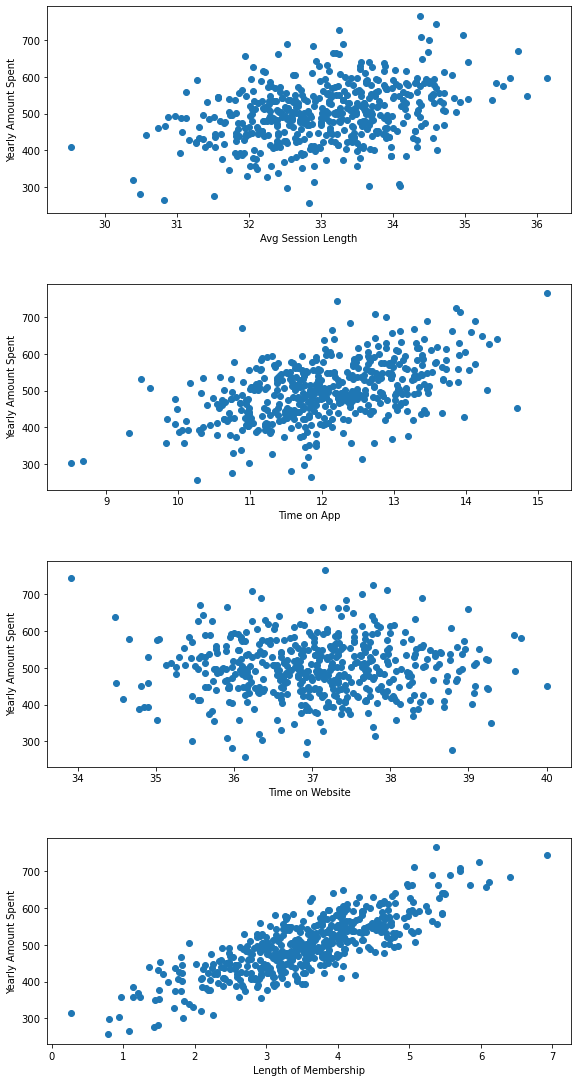

In [4]:
fig, axes = plt.subplots(4)
fig.set_figwidth(8)
fig.set_figheight(15)
fig.tight_layout(h_pad=5)

axes[0].scatter(df['Avg Session Length'],df['Yearly Amount Spent'])
axes[0].set_xlabel('Avg Session Length')
axes[0].set_ylabel('Yearly Amount Spent')
     
axes[1].scatter(df['Time on App'],df['Yearly Amount Spent'])
axes[1].set_xlabel('Time on App')
axes[1].set_ylabel('Yearly Amount Spent')
     
axes[2].scatter(df['Time on Website'],df['Yearly Amount Spent'])
axes[2].set_xlabel('Time on Website')
axes[2].set_ylabel('Yearly Amount Spent')
     
axes[3].scatter(df['Length of Membership'],df['Yearly Amount Spent'])
axes[3].set_xlabel('Length of Membership')
axes[3].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [7]:
df.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Judjing from the correlation table, the one feature that has the most correlation with our
target variable is "Length of Membership". So, it would be logical to leave only this feature
to build our linear model.

In [27]:
df1 = df[['Length of Membership','Yearly Amount Spent']]
df1['ones'] = 1
df1

c:\users\user-pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Length of Membership,Yearly Amount Spent,ones
0,4.082621,587.951054,1
1,2.664034,392.204933,1
2,4.104543,487.547505,1
3,3.120179,581.852344,1
4,4.446308,599.406092,1
...,...,...,...
495,3.746573,573.847438,1
496,3.576526,529.049004,1
497,4.958264,551.620145,1
498,2.336485,456.469510,1


### Divide the dataset into training and test sets with the ratio 80:20.

In [28]:
x_train,x_test,y_train,y_test = train_test_split(df1[df1.columns.difference(['Yearly Amount Spent'])],df1['Yearly Amount Spent'],test_size=0.2,random_state=10)

In [29]:
x_train, y_train

(     Length of Membership  ones
 305              5.566385     1
 107              3.004743     1
 350              3.827376     1
 334              1.977007     1
 142              3.914385     1
 ..                    ...   ...
 320              1.200484     1
 15               3.357847     1
 484              2.782758     1
 125              4.531987     1
 265              4.256983     1
 
 [400 rows x 2 columns],
 305    689.787604
 107    378.330907
 350    535.480775
 334    330.594446
 142    463.923513
           ...    
 320    368.654785
 15     461.780742
 484    462.656519
 125    541.226584
 265    567.475011
 Name: Yearly Amount Spent, Length: 400, dtype: float64)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [30]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    x = np.dot(data_vector.T,data_vector)
    y = np.dot(data_vector.T,response_vector)

    coef = np.dot(np.linalg.inv(x),y)
    
    return coef

In [31]:
betas = fit_1d_linear_regression(x_train,y_train)
print(betas)

[ 63.63094859 272.99372552]


The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [48]:
def plot_fitted_line(b0 = betas[1],
                     b1 = betas[0],
                     x = x_test['Length of Membership'],
                     y = y_test):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.scatter(x,y,color='r')
    plt.plot(x,betas[1]+x*betas[0],color='b')
    plt.title('Regression Line - Length of Memebership vs Yearly Amount Spent')
    plt.xlabel('Length of Memebership')
    plt.ylabel('Yearly Amount Spent')
    
    plt.show()
    
    plt.savefig('Hovhannes.png')
    
    pass

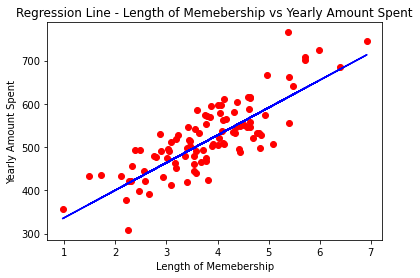

<Figure size 432x288 with 0 Axes>

In [49]:
plot = plot_fitted_line()

### Plot example

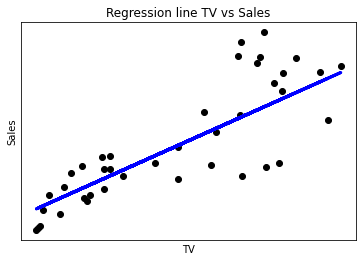

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

Coefficient(beta1): [63.63094859] 
Intercept(beta0):  272.99372551661463


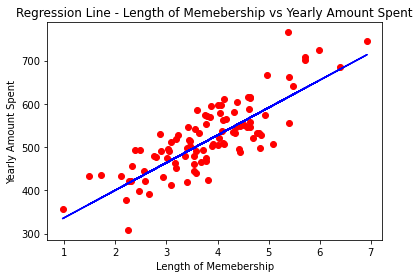

In [52]:
df1 = df[['Length of Membership','Yearly Amount Spent']]

x_train,x_test,y_train,y_test = train_test_split(df1[df1.columns.difference(['Yearly Amount Spent'])],df1['Yearly Amount Spent'],test_size=0.2,random_state=10)

regr = linear_model.LinearRegression()

betas = regr.fit(x_train,y_train)
print('Coefficient(beta1):', betas.coef_, '\nIntercept(beta0): ',betas.intercept_)

#Yearly Amount Spent = 63.631*Length of Membership + 273

y_pred = betas.predict(x_test)

plt.scatter(x_test,y_test,color='r')
plt.plot(x_test,y_pred,color='b')
plt.title('Regression Line - Length of Memebership vs Yearly Amount Spent')
plt.xlabel('Length of Memebership')
plt.ylabel('Yearly Amount Spent')

plt.show()

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [53]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

print('R-squared: %.2f'
      % r2_score(y_test, y_pred))

Mean absolute error: 40.07
Mean squared error: 2303.98
Root mean squared error: 48.00
R-squared: 0.66


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [54]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [55]:
x_Train,x_Test,y_Train,y_Test = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'],test_size=0.2,random_state=20)

In [56]:
x_Train

,Avg Session Length,Length of Membership,Time on App,Time on Website
115,33.235607,2.594190,11.223369,37.692301
80,31.514738,3.751735,12.595671,39.600376
30,33.241900,3.062368,12.305418,36.163648
445,32.212924,4.331863,11.732991,35.633954
379,33.971722,1.130477,12.284467,38.295725
...,...,...,...,...
412,33.863189,3.013033,11.523523,35.938045
223,34.814984,4.389455,12.114945,36.288724
271,33.540479,5.007272,12.884125,36.226042
474,33.700886,2.379076,13.471578,37.071643


In [59]:
regression = linear_model.LinearRegression()

model = regr.fit(x_Train,y_Train)

y_predicted = betas.predict(x_Test)

np.array(y_Test), y_predicted

(array([471.60288439, 420.73767324, 424.18549429, 357.85798361,
        407.54216801, 573.41586733, 510.66179222, 376.33690076,
        554.72208383, 557.60826205, 627.60331871, 490.6004425 ,
        535.32161009, 520.89879445, 461.79095906, 373.8857237 ,
        368.65478495, 494.55186109, 583.07963566, 407.70454755,
        447.68790654, 538.94197453, 591.43773557, 669.9871405 ,
        469.38314617, 470.4527333 , 611.0000251 , 424.2028271 ,
        576.8025474 , 483.15972078, 604.84131882, 408.95833594,
        479.73193765, 550.81336773, 485.92313052, 557.52927361,
        436.28349815, 514.08895775, 487.54750487, 537.91575292,
        474.53232944, 528.93361857, 523.63393514, 442.06441376,
        578.24160506, 457.84769594, 479.61481167, 533.51493526,
        426.77521599, 483.79652206, 565.9943634 , 501.10024523,
        492.60601272, 616.66028602, 663.07481761, 561.87465767,
        497.77864222, 430.58888256, 640.5840619 , 502.4097853 ,
        521.88357317, 416.35835358, 563.

In [60]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_Test, y_predicted))

print('Mean squared error: %.2f'
      % mean_squared_error(y_Test, y_predicted))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_Test, y_predicted)))

print('R-squared: %.2f'
      % r2_score(y_Test, y_predicted))

Mean absolute error: 8.32
Mean squared error: 110.24
Root mean squared error: 10.50
R-squared: 0.98
